## Загрузка данных

In [1]:
!pip install --upgrade scikit-learn

!pip install optuna-integration[sklearn]
!pip install phik -q
!pip install yellowbrick
!pip install shap
!pip install imbalanced-learn 
!pip install optuna 
!pip install mlxtend 
!pip install imbalanced-learn 
!pip install --upgrade shap
!pip install --upgrade shap matplotlib
!pip install --upgrade seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import scipy.stats as stats
from sklearn.metrics import (
    accuracy_score, 
    recall_score, 
    precision_score,  
    confusion_matrix,
    roc_auc_score,
    f1_score)
#import warnings
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC 


import phik


from yellowbrick.classifier.rocauc import roc_auc 


import shap


from imblearn.over_sampling import RandomOverSampler


from optuna.integration import OptunaSearchCV 


from mlxtend.plotting import plot_decision_regions 
from itertools import combinations

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,   StandardScaler,  MinMaxScaler, RobustScaler,LabelEncoder
   

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
market_file=pd.read_csv('/datasets/market_file.csv')
market_money=pd.read_csv('/datasets/market_money.csv')
market_time=pd.read_csv('/datasets/market_time.csv')
money=pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')

##### Вывод:
* Установлены дополнительные библиотеки для визуализации, предсказания, оценки модели и данных
* Установка последней версии scikit-learn

##  Предобработка данных

In [4]:
market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [5]:
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [6]:
market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [7]:
money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


**Данные в таблицах соответствуют описанию**

#### Приводим названия колонок к удобному виду. Удаляем и проверяем дубликаты

In [8]:
market_file.columns = ['id','purchasing_activity','service_type','allow_reporting', 'market_active_6_months',
 'market_asset_Current_month', 'duration', 'promotional_purchases', 'popular_category', 
'average_category_views_per_visit', 'unpaid_products_pieces_quarter','service_error', 'pages_per_visit']

market_file=market_file.drop_duplicates().reset_index(drop=True)
market_file.duplicated().sum()

0

In [9]:
market_money.columns = ['id', 'period', 'revenue']
market_money=market_money.drop_duplicates().reset_index(drop=True)
market_money.duplicated().sum()

0

In [10]:
market_time.columns = ['id', 'period','minutes']
market_time=market_time.drop_duplicates().reset_index(drop=True)
market_time.duplicated().sum()

0

In [11]:
money.columns = ['id', 'profit']
money=money.drop_duplicates().reset_index(drop=True)
money.duplicated().sum()

0

#### Проверяем данные на пропуски

In [12]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1300 non-null   int64  
 1   purchasing_activity               1300 non-null   object 
 2   service_type                      1300 non-null   object 
 3   allow_reporting                   1300 non-null   object 
 4   market_active_6_months            1300 non-null   float64
 5   market_asset_Current_month        1300 non-null   int64  
 6   duration                          1300 non-null   int64  
 7   promotional_purchases             1300 non-null   float64
 8   popular_category                  1300 non-null   object 
 9   average_category_views_per_visit  1300 non-null   int64  
 10  unpaid_products_pieces_quarter    1300 non-null   int64  
 11  service_error                     1300 non-null   int64  
 12  pages_

In [13]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   period   3900 non-null   object 
 2   revenue  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [14]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2600 non-null   int64 
 1   period   2600 non-null   object
 2   minutes  2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [15]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


* **Пропусков в данных не обнаружено**
* **Данные соответствуют корректному типу: str, float, int**

#### Проверяем данные на неявные дубликаты и корректное заполнение. 

*Проверятся будут df, которые имеют тип 'str'*

In [16]:
market_file['purchasing_activity'].unique()


array(['Снизилась', 'Прежний уровень'], dtype=object)

In [17]:
market_file['service_type'] = market_file['service_type'].replace('стандартт','стандарт') 
market_file['service_type'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [18]:
market_file['allow_reporting'].unique()

array(['да', 'нет'], dtype=object)

In [19]:
market_file['popular_category'].unique()


array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [20]:
market_money['period']=market_money['period'].replace('препредыдущий_месяц','предыдущий_месяц') 
market_money['period'].unique()

array(['предыдущий_месяц', 'текущий_месяц'], dtype=object)

In [21]:
market_time['period'] = market_time['period'].replace('предыдцщий_месяц','предыдущий_месяц') 
market_time['period'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

##### Вывод:
* Изучение данных
* Проверка данных на соответствие описанию
* Проверка на пропуски
* Удаление дубликатов
* Преобразование столбцов на корректный тип данных,поиск неявных дубликатов и их устранение

In [22]:
market_money

,id,period,revenue
0,215348,предыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,предыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,предыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,предыдущий_месяц,5183.0


##  Исследовательский анализ данных

*Определим количественные и категориальные признаки df*

In [23]:
market_file

,id,purchasing_activity,service_type,allow_reporting,market_active_6_months,market_asset_Current_month,duration,promotional_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [24]:
cat_col_names_market_file = ['purchasing_activity', 'service_type', 'allow_reporting', 
                'popular_category']
num_col_names_market_file = ['market_active_6_months','market_asset_Current_month','duration', 'promotional_purchases',
'average_category_views_per_visit', 'unpaid_products_pieces_quarter', 'service_error', 'pages_per_visit']

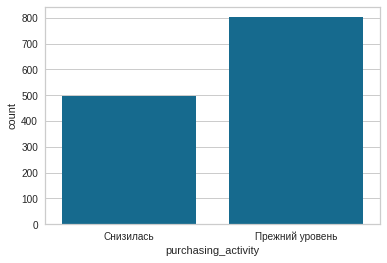

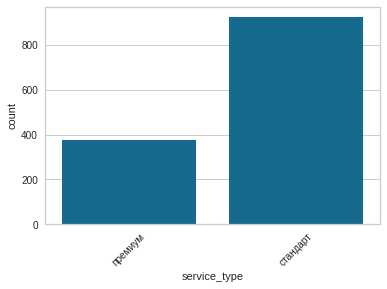

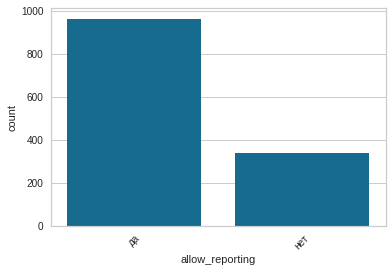

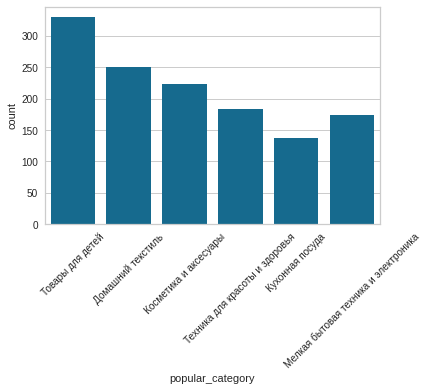

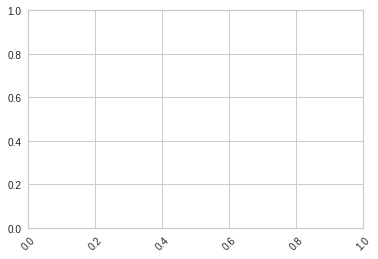

In [25]:
for i in cat_col_names_market_file:
    sns.countplot(data=market_file, x=i)
    plt.show()
    plt.xticks(rotation=45)

* Промежуточный вывод категориальных признаков _market_file:

1) Имеется некоторый дисбаланс признаков, самый главный вопрос, можем ли мы их сэплировать. Ведь как таковой мультиклассификации нет, кроме категорий товара, да и они разбросаны не с критичной разницей.

2) Вполне логично уровень прежней активности превышает, уровень низкой активности. Это касается и типа предоставляемого сервиса и разрешения на отчет.

**Не думаю, что на данном этапе стоит сэмплировать признаки**

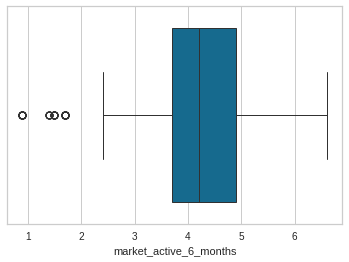

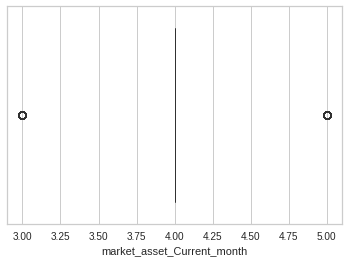

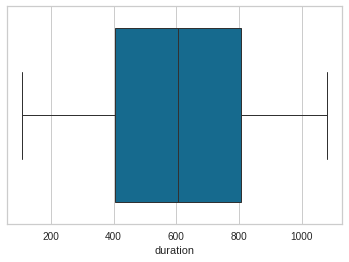

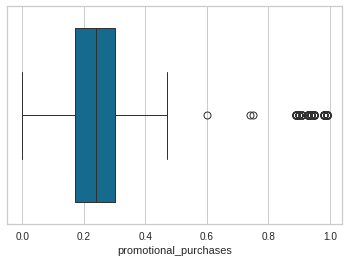

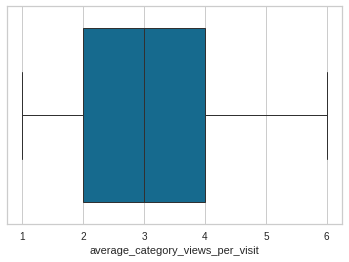

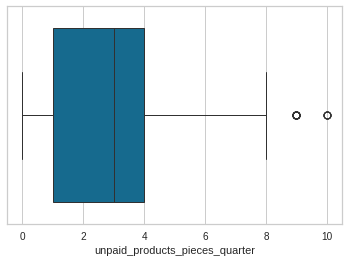

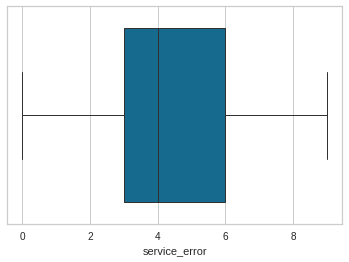

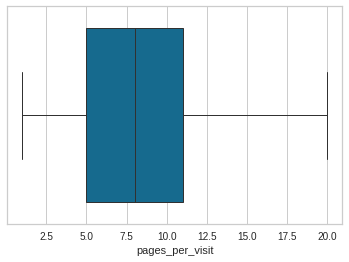

In [26]:
for i in num_col_names_market_file:
    sns.boxplot(data=market_file, x=i)
    plt.show()

* Промежуточный вывод количественных признаков _market_file на боксплоте:

1) В данных присутствуют выбросы, но они не напоминают аномальные значения и не похоже, что были допущены ошибки. Не уверен, что будет корректно их удалять. Выбросы находятся в пределах своих значений, значит эти данные реальные, скорее всего редкость получать высокие значения. Принимаю решение оставить выбросы, но при построениях модели и метрик будем принимать параметы устойчивым к выбросам. Вполне возможно, что входе исследования потребуется изменить решение и удалить выбросы


2) маркетинговая активность в текущем месяце ведет себя странно. Возможно признак стоит переделать в категориальный. Посмотрим после корелляционного анализа. Может быть он нам не понадобится

In [27]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1300 non-null   int64  
 1   purchasing_activity               1300 non-null   object 
 2   service_type                      1300 non-null   object 
 3   allow_reporting                   1300 non-null   object 
 4   market_active_6_months            1300 non-null   float64
 5   market_asset_Current_month        1300 non-null   int64  
 6   duration                          1300 non-null   int64  
 7   promotional_purchases             1300 non-null   float64
 8   popular_category                  1300 non-null   object 
 9   average_category_views_per_visit  1300 non-null   int64  
 10  unpaid_products_pieces_quarter    1300 non-null   int64  
 11  service_error                     1300 non-null   int64  
 12  pages_

In [28]:
num_col_names_market_file = ['market_active_6_months', 'duration', 'promotional_purchases']

In [29]:
dis_col_names_market_file = ['market_asset_Current_month','average_category_views_per_visit','unpaid_products_pieces_quarter',
  'service_error', 'pages_per_visit']

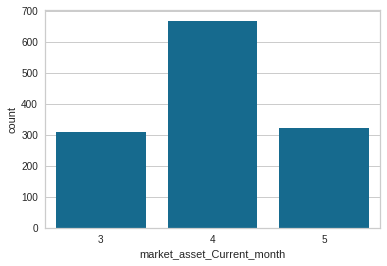

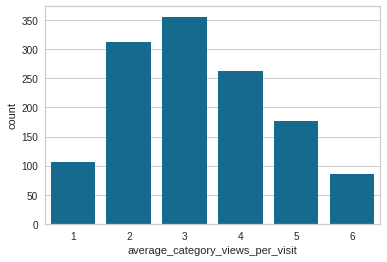

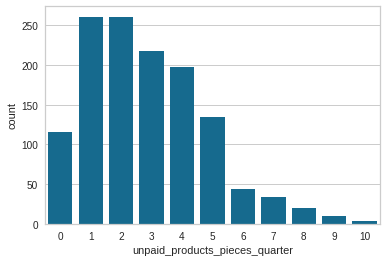

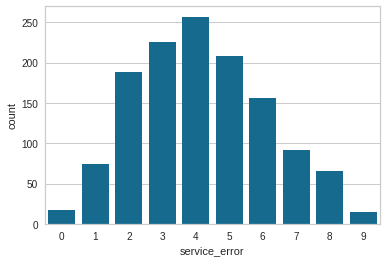

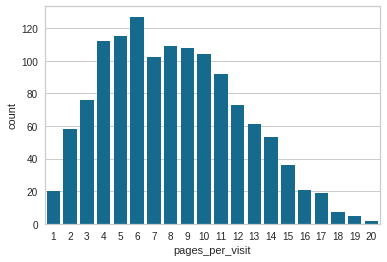

In [30]:
for i in dis_col_names_market_file:
    sns.countplot(data=market_file, x=i)
    plt.show()

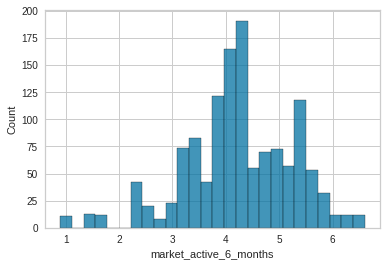

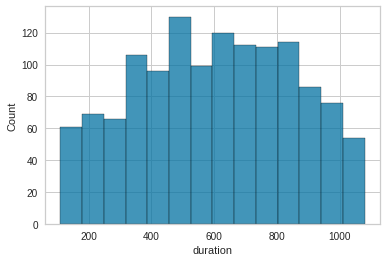

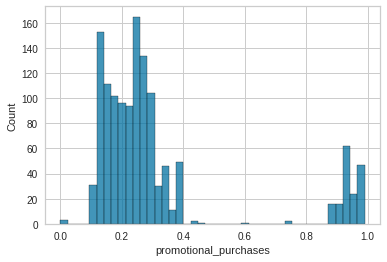

In [31]:
for i in num_col_names_market_file:
    sns.histplot(data=market_file, x=i)
    plt.show()

In [32]:
market_money

,id,period,revenue
0,215348,предыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,предыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,предыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,предыдущий_месяц,5183.0


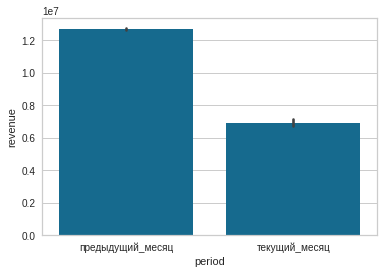

In [33]:
sns.barplot(
    x="period", 
    y="revenue",
    data=market_money, estimator=sum);

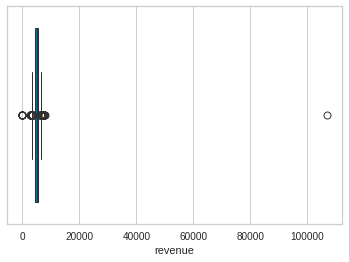

In [34]:
sns.boxplot(data=market_money, x='revenue')
plt.show()

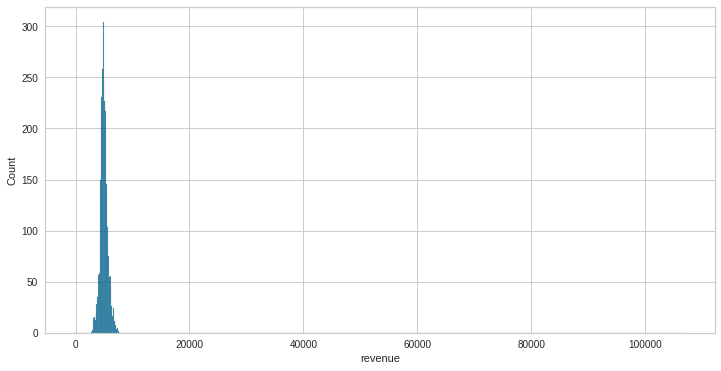

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(data=market_money, x='revenue')
plt.show()


* Промежуточный вывод количественных признаков _market_money на гистограммах:

1) За предыдущий месяц доходов больше

2) Имеем явный выброс. Думаю стоит избавиться от аномального значения

In [36]:
market_money

,id,period,revenue
0,215348,предыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,предыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,предыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,предыдущий_месяц,5183.0


In [37]:
market_money= market_money.query( 'revenue < 10000')

In [38]:
market_money

,id,period,revenue
0,215348,предыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,предыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,предыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,предыдущий_месяц,5183.0


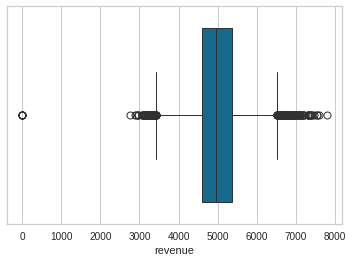

In [39]:
sns.boxplot(data=market_money, x='revenue')
plt.show()

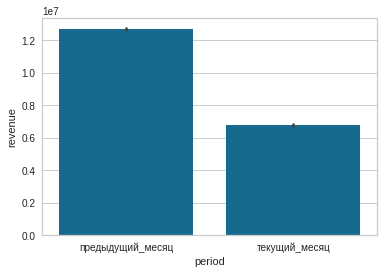

In [40]:
sns.barplot(
    x="period", 
    y="revenue",
    data=market_money,  estimator=sum);

In [41]:
market_money['revenue'].min()


0.0

**После удаления выброса доходы предыдущего месяца выше текущего**

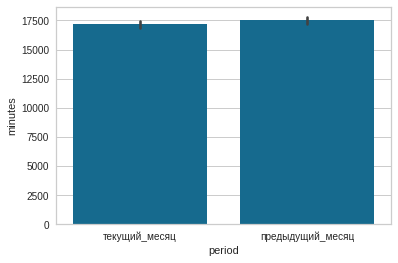

In [42]:
sns.barplot(
    x="period", 
    y="minutes",
    data=market_time,  estimator=sum);

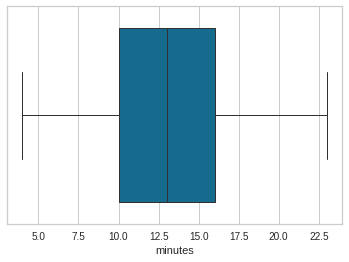

In [43]:
sns.boxplot(data=market_time, x='minutes')
plt.show()

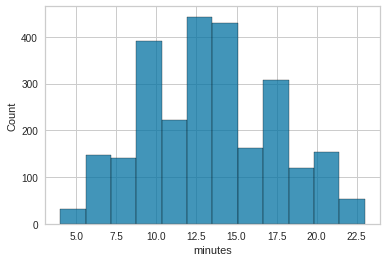

In [44]:
sns.histplot(data=market_time, x='minutes', bins = 12)
plt.show()

In [45]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2600 non-null   int64 
 1   period   2600 non-null   object
 2   minutes  2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [46]:
market_money

,id,period,revenue
0,215348,предыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,предыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,предыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,предыдущий_месяц,5183.0


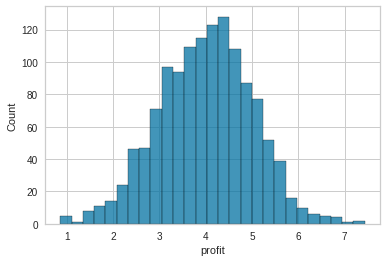

In [47]:
sns.histplot(data=money, x='profit')
plt.show()

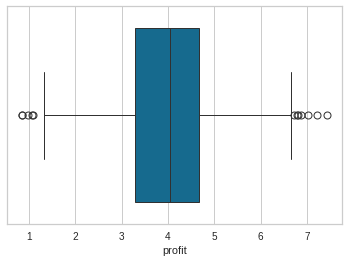

In [48]:
sns.boxplot(data=money, x='profit')
plt.show()

* Промежуточный вывод количественных признаках money на гистограммах,бокcплоте:

1) Данные также не распределены нормально, но есть выбросы. Думаю в данном случае некорректно от них избавляться. Они находятся в допустимых значениях. Вполне возможно, что какой то пользователь мог принести большую и меньшую прибыль. Предполагаю это допустимо

In [49]:

zero_market_money = market_money[(market_money['revenue'] == 0)|(market_money['revenue'] == 0)]
zero_market_money



,id,period,revenue
0,215348,предыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,предыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,предыдущий_месяц,0.0


In [50]:
zero_market_money =money.merge(zero_market_money,on = 'id')
zero_market_money

,id,profit,period,revenue
0,215348,0.98,предыдущий_месяц,0.0
1,215348,0.98,предыдущий_месяц,0.0
2,215357,4.66,предыдущий_месяц,0.0
3,215357,4.66,предыдущий_месяц,0.0
4,215359,5.08,предыдущий_месяц,0.0
5,215359,5.08,предыдущий_месяц,0.0


**Итоговый вывод блока:**


* 1) Из 1300 только 3 клиентов, ничего не покупали в предыдущах месяцах.
* 2) Однако мы видим, что прибыль клиенты приносят. Исходя из логики, в текущем месяце. Нужно понять, с чем связаны покупки в текущем месяце:

а) маркетинговая активность

б) меньше ошибок при посещении или выгодные предложения

в) разрешили отчет об ошибках

### Объединение таблиц

In [51]:
market_file.shape

(1300, 13)

In [52]:
market_money.shape

(3899, 3)

In [53]:
market_time.shape

(2600, 3)

In [54]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1300 non-null   int64  
 1   purchasing_activity               1300 non-null   object 
 2   service_type                      1300 non-null   object 
 3   allow_reporting                   1300 non-null   object 
 4   market_active_6_months            1300 non-null   float64
 5   market_asset_Current_month        1300 non-null   int64  
 6   duration                          1300 non-null   int64  
 7   promotional_purchases             1300 non-null   float64
 8   popular_category                  1300 non-null   object 
 9   average_category_views_per_visit  1300 non-null   int64  
 10  unpaid_products_pieces_quarter    1300 non-null   int64  
 11  service_error                     1300 non-null   int64  
 12  pages_

In [55]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3899 non-null   int64  
 1   period   3899 non-null   object 
 2   revenue  3899 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 250.9+ KB


In [56]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2600 non-null   int64 
 1   period   2600 non-null   object
 2   minutes  2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [57]:
len(market_file['id'].unique()) 

1300

In [58]:
len(market_money['id'].unique()) 

1300

In [59]:
len(market_time['id'].unique()) 

1300

In [60]:
market_file['id'][~market_file['id'].isin(market_money['id'])] 

Series([], Name: id, dtype: int64)

In [61]:
market_file['id'][~market_file['id'].isin(market_time['id'])] 

Series([], Name: id, dtype: int64)

In [62]:
market_money['id'][~market_money['id'].isin(market_time['id'])] 

Series([], Name: id, dtype: int64)

In [63]:
revenue_pivot =  market_money.pivot_table(index = 'id', columns='period', values='revenue', aggfunc='sum')
minutes_pivot =  market_time.pivot_table(index = 'id', columns='period', values='minutes', aggfunc='sum')

In [64]:
market_file_full = market_file.merge(minutes_pivot, on = 'id')

In [65]:
market_file_full.shape

(1300, 15)

In [66]:
market_file_full = market_file_full.merge(revenue_pivot, on = 'id')

In [67]:
market_file_full.shape

(1300, 17)

In [68]:
market_file_full 

,id,purchasing_activity,service_type,allow_reporting,market_active_6_months,market_asset_Current_month,duration,promotional_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,предыдущий_месяц_x,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,13,14,0.0,3293.1
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,9688.0,4971.6
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,10283.5,5058.4
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,10951.0,6610.4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,10401.5,5872.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,14,7,8368.0,4741.7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,12,11,10028.0,5353.0
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,12,18,10494.0,5139.2
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,18,7,9648.0,5224.6


In [69]:
market_file_full  = market_file_full.rename(columns = {'предыдущий_месяц_x' : 'last_month_minutes','текущий_месяц_x': 'current_month_minutes',
'предыдущий_месяц_y': 'last_month_revenue', 'текущий_месяц_y': 'current_month_revenue'  })

In [70]:
market_file_full 

,id,purchasing_activity,service_type,allow_reporting,market_active_6_months,market_asset_Current_month,duration,promotional_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,last_month_minutes,current_month_minutes,last_month_revenue,current_month_revenue
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,13,14,0.0,3293.1
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,9688.0,4971.6
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,10283.5,5058.4
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,10951.0,6610.4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,10401.5,5872.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,14,7,8368.0,4741.7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,12,11,10028.0,5353.0
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,12,18,10494.0,5139.2
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,18,7,9648.0,5224.6


**Итоговый вывод блока:**

1) Объедены таблицы

2) Сформированы новые столбцы: проведения времени на сайте и доход по каждому пользователю в текущем и прошлом месяцах

### Корреляционный анализ

In [71]:
le = LabelEncoder()
market_file_full['purchasing_activity'] = le.fit_transform(market_file_full['purchasing_activity'])

In [72]:
market_file_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1300 non-null   int64  
 1   purchasing_activity               1300 non-null   int64  
 2   service_type                      1300 non-null   object 
 3   allow_reporting                   1300 non-null   object 
 4   market_active_6_months            1300 non-null   float64
 5   market_asset_Current_month        1300 non-null   int64  
 6   duration                          1300 non-null   int64  
 7   promotional_purchases             1300 non-null   float64
 8   popular_category                  1300 non-null   object 
 9   average_category_views_per_visit  1300 non-null   int64  
 10  unpaid_products_pieces_quarter    1300 non-null   int64  
 11  service_error                     1300 non-null   int64  
 12  pages_

In [73]:
num_col_names_market_file_for_phik = ['market_active_6_months', 'duration', 'promotional_purchases', 'last_month_minutes'
                                    'current_month_minutes','last_month_revenue','current_month_revenue' ]

In [74]:
market_file_full.drop('id', axis =1).phik_matrix(interval_cols= num_col_names_market_file_for_phik )

,purchasing_activity,service_type,allow_reporting,market_active_6_months,market_asset_Current_month,duration,promotional_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,last_month_minutes,current_month_minutes,last_month_revenue,current_month_revenue
purchasing_activity,1.000000,0.132277,0.000000,0.545630,0.000000,0.089995,0.498954,0.297053,0.535431,0.402574,0.219823,0.748398,0.602299,0.569605,0.197107,0.197806
service_type,0.132277,1.000000,0.286015,0.092477,0.044600,0.405711,0.046192,0.066787,0.181069,0.114099,0.073367,0.088330,0.119062,0.056684,0.011004,0.121108
allow_reporting,0.000000,0.286015,1.000000,0.000000,0.052267,0.249165,0.000000,0.071386,0.071829,0.162462,0.000000,0.096469,0.064523,0.000000,0.000000,0.062021
market_active_6_months,0.545630,0.092477,0.000000,1.000000,0.078349,0.000000,0.241500,0.149938,0.206398,0.215234,0.141742,0.373082,0.321970,0.328418,0.101621,0.035866
market_asset_Current_month,0.000000,0.044600,0.052267,0.078349,1.000000,0.178717,0.011341,0.132810,0.247489,0.144497,0.115543,0.000000,0.162378,0.082784,0.108467,0.000000
duration,0.089995,0.405711,0.249165,0.000000,0.178717,1.000000,0.124509,0.000000,0.191292,0.115885,0.185802,0.111171,0.075764,0.035797,0.128757,0.141601
promotional_purchases,0.498954,0.046192,0.000000,0.241500,0.011341,0.124509,1.000000,0.102826,0.196895,0.245399,0.079912,0.343749,0.333161,0.303735,0.711519,0.087261
popular_category,0.297053,0.066787,0.071386,0.149938,0.132810,0.000000,0.102826,1.000000,0.224104,0.254464,0.000000,0.175765,0.217623,0.115083,0.304752,0.235239
average_category_views_per_visit,0.535431,0.181069,0.071829,0.206398,0.247489,0.191292,0.196895,0.224104,1.000000,0.335158,0.067988,0.291334,0.218241,0.237860,0.106534,0.101008
unpaid_products_pieces_quarter,0.402574,0.114099,0.162462,0.215234,0.144497,0.115885,0.245399,0.254464,0.335158,1.000000,0.016883,0.307712,0.192026,0.157671,0.244990,0.165441


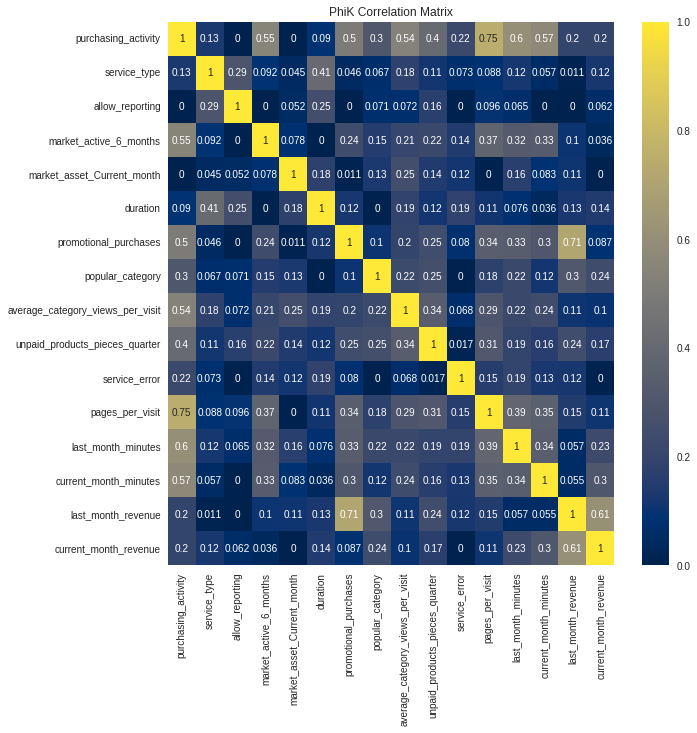

In [75]:

phik_matrix_result = market_file_full.drop('id', axis =1).phik_matrix(interval_cols= num_col_names_market_file_for_phik)
plt.figure(figsize=(10, 10))  
sns.heatmap(phik_matrix_result, annot=True, cmap='cividis')
plt.title('PhiK Correlation Matrix') 
plt.show() 

**Вывод блока**

1) Мультикореиальность отсутствует 

2) Утечка цел. признака отсутствует

3) Признаки allow reporting и market_asset_Current_month не имеют корреляции с целевым признаком. Возможно их стоит удалить из пайплайна



### Использование пайплайнов

In [76]:
market_file_full['last_month_revenue'] = market_file_full['last_month_revenue'].isna().median()
market_file_full['current_month_revenue'] = market_file_full['current_month_revenue'].isna().median()
market_file_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1300 non-null   int64  
 1   purchasing_activity               1300 non-null   int64  
 2   service_type                      1300 non-null   object 
 3   allow_reporting                   1300 non-null   object 
 4   market_active_6_months            1300 non-null   float64
 5   market_asset_Current_month        1300 non-null   int64  
 6   duration                          1300 non-null   int64  
 7   promotional_purchases             1300 non-null   float64
 8   popular_category                  1300 non-null   object 
 9   average_category_views_per_visit  1300 non-null   int64  
 10  unpaid_products_pieces_quarter    1300 non-null   int64  
 11  service_error                     1300 non-null   int64  
 12  pages_

In [77]:
RANDOM_STATE = 42
TEST_SIZE = 0.25


X_train, X_test, y_train, y_test = train_test_split(
    market_file_full.drop(['id', 'purchasing_activity'], axis=1),
    market_file_full['purchasing_activity'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_file_full['purchasing_activity'])

X_train.shape, X_test.shape

# создаём списки с названиями признаков
ohe_columns = ['popular_category','allow_reporting']
ord_columns = ['service_type']
num_columns = ['market_active_6_months','duration','promotional_purchases','market_asset_Current_month',
'average_category_views_per_visit', 'unpaid_products_pieces_quarter','service_error','pages_per_visit', 'last_month_minutes',
               'current_month_minutes', 'last_month_revenue', 'current_month_revenue']

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

ord_pipe = Pipeline(
   [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
      ('ord',  OrdinalEncoder(
                categories=[
                    ['премиум', 'стандарт']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
     ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
     {
        'models': [SVC(random_state=RANDOM_STATE,probability=True)],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['popular_category',
                                                   'allow_reporting']),
                                                 ('ord',
                                        

In [78]:

grid_search = GridSearchCV(pipe_final, param_grid, cv=5, scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict_proba(X_test)[:, 1]

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['popular_category',
                                                   'allow_reporting']),
                                                 ('ord',
                                        

In [79]:
result = pd.DataFrame(randomized_search.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')) 

,rank_test_score,param_models,mean_test_score,params
5,1,"SVC(probability=True, random_state=42)",0.915476,"{'preprocessor__num': RobustScaler(), 'models_..."
0,2,"SVC(probability=True, random_state=42)",0.905596,"{'preprocessor__num': MinMaxScaler(), 'models_..."
2,3,"LogisticRegression(penalty='l1', random_state=...",0.902147,"{'preprocessor__num': RobustScaler(), 'models_..."
9,4,"LogisticRegression(penalty='l1', random_state=...",0.901903,"{'preprocessor__num': MinMaxScaler(), 'models_..."
3,5,DecisionTreeClassifier(random_state=42),0.820980,"{'preprocessor__num': RobustScaler(), 'models_..."
4,6,DecisionTreeClassifier(random_state=42),0.812804,"{'preprocessor__num': StandardScaler(), 'model..."
7,7,DecisionTreeClassifier(random_state=42),0.804849,"{'preprocessor__num': RobustScaler(), 'models_..."
6,8,DecisionTreeClassifier(random_state=42),0.769705,"{'preprocessor__num': RobustScaler(), 'models_..."
8,9,DecisionTreeClassifier(random_state=42),0.767321,"{'preprocessor__num': StandardScaler(), 'model..."
1,10,DecisionTreeClassifier(random_state=42),0.763507,"{'preprocessor__num': StandardScaler(), 'model..."


**Промежуточный вывод блока**
1) Перебор гиперпараметров с помощью GridSearchCV показал более лучший результат

2) SVM показал лучшее качество среди всех четырех моделей



In [80]:
data_preprocessor.fit_transform(X_train) 
X_test_final = pd.DataFrame(data_preprocessor.transform(X_test), columns = data_preprocessor.get_feature_names_out() )
explainer = shap.Explainer(grid_search.best_estimator_.named_steps['models'].predict_proba, X_test_final)
shap_values = explainer( X_test_final)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/conda

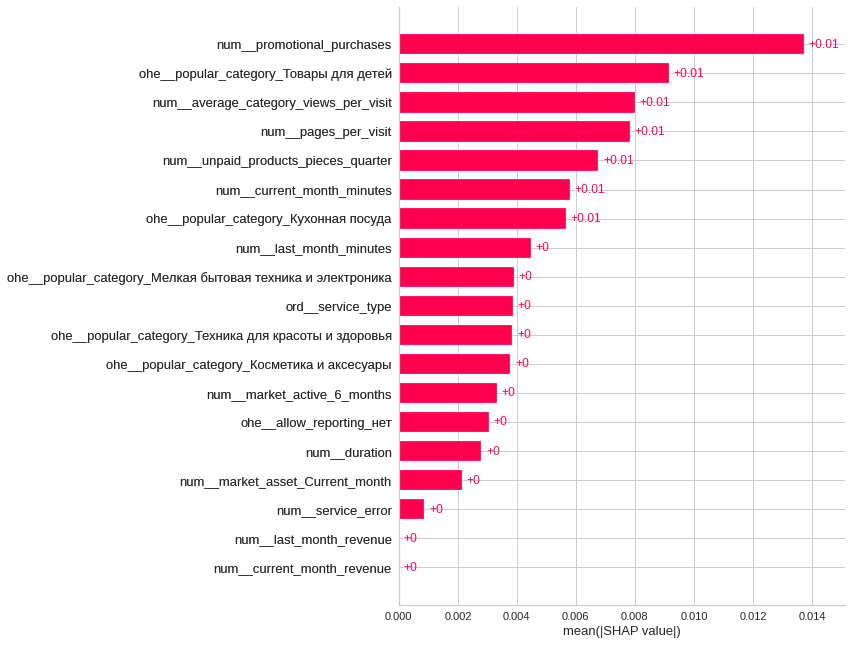

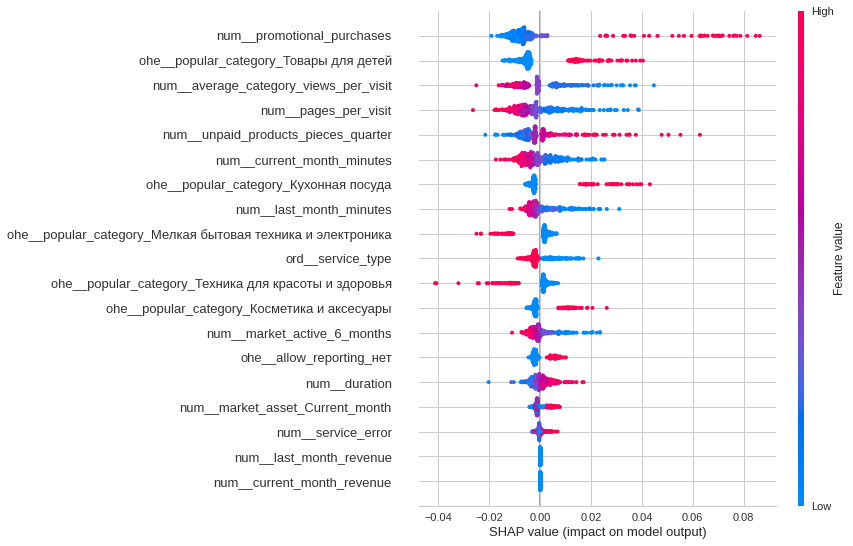

In [81]:
shap.plots.bar(shap_values[:,:, 1], max_display=22)
shap.plots.beeswarm(shap_values[:,:, 1], max_display=22)

In [82]:
# X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)

# explainer = shap.Explainer(grid_search.best_estimator_.named_steps['models'].predict_proba, X_train_2)

# X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)

# feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

# X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

# shap_values = explainer(X_test_2)

# shap.plots.bar(shap_values[:,:, 1], max_display=22)
# shap.plots.beeswarm(shap_values[:,:, 1], max_display=22) 



**Тут просто тестирую новый (преобразованный признак)**

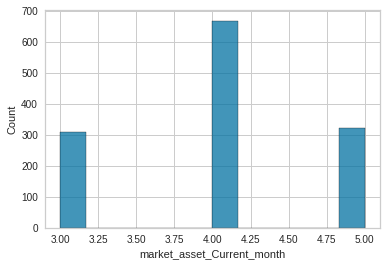

In [83]:
sns.histplot(data = market_file_full, x = 'market_asset_Current_month');

In [84]:
market_file_full['market_asset_Current_month'] = pd.cut(market_file_full['market_asset_Current_month'], bins=3, labels=False) 

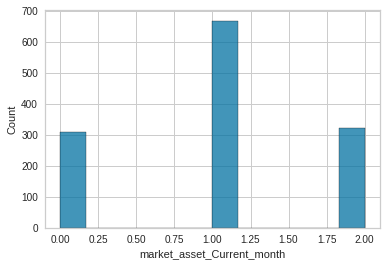

In [85]:
sns.histplot(data = market_file_full, x = 'market_asset_Current_month');

In [86]:
RANDOM_STATE = 42
TEST_SIZE = 0.25


X_train, X_test, y_train, y_test = train_test_split(
    market_file_full.drop(['id', 'purchasing_activity'], axis=1),
    market_file_full['purchasing_activity'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_file_full['purchasing_activity'])

X_train.shape, X_test.shape

# создаём списки с названиями признаков
ohe_columns = ['service_type','market_asset_Current_month', 'popular_category','allow_reporting']
#ord_columns = ['popular_category']
num_columns = ['market_active_6_months','duration','promotional_purchases',
'average_category_views_per_visit', 'unpaid_products_pieces_quarter','service_error','pages_per_visit', 'last_month_minutes',
               'current_month_minutes', 'last_month_revenue', 'current_month_revenue']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
# ord_pipe = Pipeline(
#     [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
#      ('ord',  OrdinalEncoder(
#                 categories=[
#                     ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
#        'Техника для красоты и здоровья', 'Кухонная посуда',
#        'Мелкая бытовая техника и электроника'],
#                 ], 
#                 handle_unknown='use_encoded_value', unknown_value=np.nan
#             )
#         ),
#      ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
#     ]
# )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
#     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
     {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['service_type',
                                                   'market_asset_Current_month',
                                                   'popular_category',
                     

In [87]:
grid_search = GridSearchCV(pipe_final, param_grid, cv=5, scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = grid_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['service_type',
                                                   'market_asset_Current_month',
                                                   'popular_category',
                     

**Промежуточный вывод блока**
1) Переобразование в категории признака market_asset_Current_month модель не улучшила. 

2) Исходя из графика гистограммы market_asset_Current_month имел провалы. Я предположил, что имеет смысл закодировать и преобразовать в по три категории

**Общий вывод блока**

1) Перебор гиперпараметров с помощью GridSearchCV показал более лучший результат из пайплайна №1

2) SVM показал лучшее качество среди всех четырех моделей из пайплайна №1

3) SHAP значения показывают, что промоакции отлично влияют на покупательскую активность, а также товары для детей.
Склонны к низкой активности покупатели, которые покупают технику и электронику

4) Создание нового признака, а точнее его преобразование не помогло улучшить модель



### Сегментация покупателей

In [88]:
segment = market_file_full.merge( market_money,on = 'id')
segment

,id,purchasing_activity,service_type,allow_reporting,market_active_6_months,market_asset_Current_month,duration,promotional_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,last_month_minutes,current_month_minutes,last_month_revenue,current_month_revenue,period,revenue
0,215348,1,премиум,да,3.4,2,121,0.00,Товары для детей,6,2,1,5,13,14,0.0,0.0,предыдущий_месяц,0.0
1,215348,1,премиум,да,3.4,2,121,0.00,Товары для детей,6,2,1,5,13,14,0.0,0.0,текущий_месяц,3293.1
2,215348,1,премиум,да,3.4,2,121,0.00,Товары для детей,6,2,1,5,13,14,0.0,0.0,предыдущий_месяц,0.0
3,215349,1,премиум,да,4.4,1,819,0.75,Товары для детей,4,4,2,5,12,10,0.0,0.0,предыдущий_месяц,4472.0
4,215349,1,премиум,да,4.4,1,819,0.75,Товары для детей,4,4,2,5,12,10,0.0,0.0,текущий_месяц,4971.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,216646,0,стандарт,да,6.3,2,645,0.12,Техника для красоты и здоровья,3,3,5,7,18,7,0.0,0.0,предыдущий_месяц,4725.0
3895,216646,0,стандарт,да,6.3,2,645,0.12,Техника для красоты и здоровья,3,3,5,7,18,7,0.0,0.0,предыдущий_месяц,4923.0
3896,216647,0,премиум,да,4.0,2,906,0.94,Техника для красоты и здоровья,4,5,3,12,15,10,0.0,0.0,предыдущий_месяц,4720.0
3897,216647,0,премиум,да,4.0,2,906,0.94,Техника для красоты и здоровья,4,5,3,12,15,10,0.0,0.0,предыдущий_месяц,5183.0


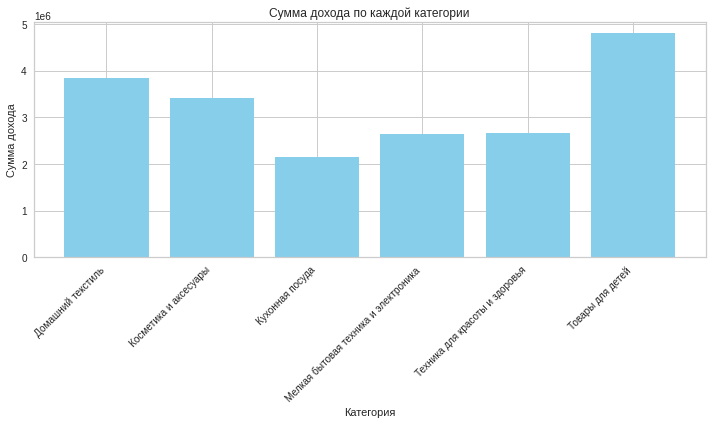

In [89]:

segment =segment.groupby('popular_category')['revenue'].sum().reset_index()

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(segment['popular_category'],segment['revenue'], color='skyblue')
plt.title('Сумма дохода по каждой категории')
plt.xlabel('Категория')
plt.ylabel('Сумма дохода')
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X для лучшей читаемости
plt.tight_layout()  # Подгонка графика
plt.show()

График показывает, что клиенты покупающие электронику и технику приносят прибыли практически на равне с клиентами, которые покупают товары для детей. Однако они склонны к низкой активности, так как подобного рода товары имеют длинный жизненный цикл.

**Можно подумать над следующими предложениями для подобного сегмента клиентов:**

1) Дополнительные акционные предложения для сегмента

2) Попробовать привлечь их на подписку премиум, включив на нее доп. гарантии. Бесплатная заамена, гарантия техники на больший срок

### Общий вывод

**Задача**
1) Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

2) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента

3) Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Исходные данные**

1) Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

2) Таблица с данными о выручке, которую получает магазин с покупателя

3) Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

4) Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца


**Предоброботка данных**

* Изучение данных
* Проверка данных на соответствие описанию
* Проверка на пропуски
* Удаление дубликатов
* Преобразование столбцов на корректный тип данных,поиск неявных дубликатов и их устранение


**Лучшая модель**

Лучшие реузльтаты показала модель svm с регурилизацией С=1. Метрика выбрана roc-auc также показала высокие результаты. Метрика отлично подходит при дисбалансе классов и чтобы отработать по бинарной классификации.

**Сегментация**
Выше мною был проанализирован сегмент и внесены предложения по увеличению активности. Однако нельзя забывать самую популярную категорию товара ''Товары для детей''. Таких клиентов нужно постараться удержать магазину с помощью маркетинговых активностей